In [47]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [48]:
raw_data=pd.read_csv('12.01.2024 Wakanda Final for analysis _CSV format1.csv')

In [49]:
raw_data.rename(columns={'Top floor C&H savings (%)': 'savings'}, inplace= True)
savings_per=raw_data.savings.str.replace('%','').astype('float')
raw_data['Savings_Percentage']=savings_per

In [50]:
columns_name=[ '#','City','c0: Total Energy', 'Total Energy Savings (%)',
       'c1: Total Cooling', 'Top Floor_Total Cooling',
       'Top Floor_Total Heating', 'Top Floor _ total C&H', 'savings',
       'Topfloor Cooling Savings (%)']
raw_data.drop(columns_name,axis=1,inplace=True)


In [51]:
raw_data['Building Orientation']=raw_data['Building Orientation'].astype(str)

In [52]:
raw_data.columns

Index(['Climatic Zone', 'Shade Direction', 'Building Orientation',
       'Latitude (Deg North)', 'Longitude (Deg East)', 'Shade extent ',
       'Roof U-Value (W/m2K)', 'Height of Shade (m)', 'Shading Transmittance',
       'Savings_Percentage'],
      dtype='object')

In [53]:
mask=raw_data['Shading Transmittance']==1

In [54]:
new_data = raw_data[mask].reset_index(drop=True)


In [55]:
new_data.columns

Index(['Climatic Zone', 'Shade Direction', 'Building Orientation',
       'Latitude (Deg North)', 'Longitude (Deg East)', 'Shade extent ',
       'Roof U-Value (W/m2K)', 'Height of Shade (m)', 'Shading Transmittance',
       'Savings_Percentage'],
      dtype='object')

In [56]:
columns_name=['Climatic Zone', 'Shade Direction', 
        'Shade extent ','Building Orientation',
        'Height of Shade (m)', 'Shading Transmittance'
       ]
new_data.drop(columns_name,axis=1,inplace=True)


In [57]:
new_data

,Latitude (Deg North),Longitude (Deg East),Roof U-Value (W/m2K),Savings_Percentage
0,17.67,75.9064,4.0,0.0
1,17.67,75.9064,4.0,0.0
2,17.67,75.9064,4.0,0.0
3,17.67,75.9064,4.0,0.0
4,17.67,75.9064,4.0,0.0
...,...,...,...,...
99833,12.97,77.5946,0.2,22.0
99834,12.97,77.5946,0.2,22.0
99835,12.97,77.5946,0.2,22.0
99836,12.97,77.5946,0.2,22.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(columns=['Roof U-Value (W/m2K)']),new_data['Roof U-Value (W/m2K)'], test_size = 0.2, random_state = 0,stratify=new_data['Roof U-Value (W/m2K)'])

In [59]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor

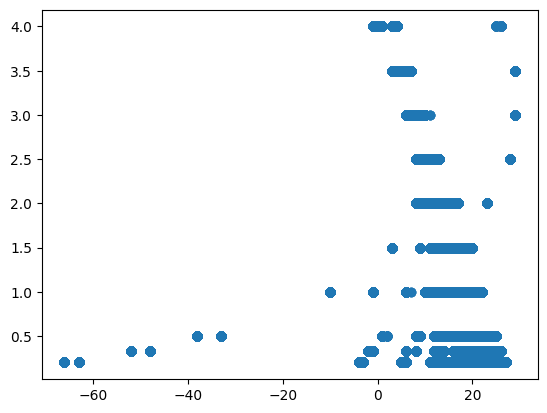

In [60]:
plt.scatter(new_data['Savings_Percentage'],new_data['Roof U-Value (W/m2K)'])

In [61]:
rt=DecisionTreeRegressor(criterion='squared_error')

In [62]:
rt.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
y_pred=rt.predict(X_test)

In [64]:
r2_score(y_test,y_pred)

0.9571490141246568

In [65]:
X=new_data.drop(['Roof U-Value (W/m2K)'],axis=1)
feature_name=X.columns

In [66]:
from sklearn.tree import export_graphviz
export_graphviz(rt, out_file="tree-u-val.dot",feature_names=feature_name, impurity=True, filled=True)

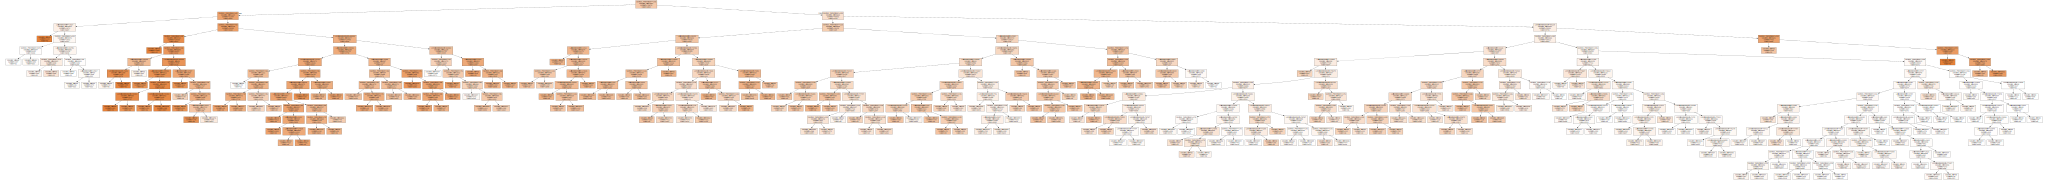

In [67]:
import graphviz
with open("tree-u-val.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 8, activation = tf.nn.elu),
    tf.keras.layers.Dense(units = 4, activation = tf.nn.elu),
    tf.keras.layers.Dense(units = 1)
    ])

    model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.005), metrics=['mae', 'mse'])

    return model

# Wrap the model using the function you created with the determined input_shape
tnf4 = KerasRegressor(build_fn=create_model, verbose=0, batch_size = 128, epochs = 64)

C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_34196\3939391507.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  tnf4 = KerasRegressor(build_fn=create_model, verbose=0, batch_size = 128, epochs = 64)


In [69]:
new_data

,Latitude (Deg North),Longitude (Deg East),Roof U-Value (W/m2K),Savings_Percentage
0,17.67,75.9064,4.0,0.0
1,17.67,75.9064,4.0,0.0
2,17.67,75.9064,4.0,0.0
3,17.67,75.9064,4.0,0.0
4,17.67,75.9064,4.0,0.0
...,...,...,...,...
99833,12.97,77.5946,0.2,22.0
99834,12.97,77.5946,0.2,22.0
99835,12.97,77.5946,0.2,22.0
99836,12.97,77.5946,0.2,22.0


In [70]:
X_train

,Latitude (Deg North),Longitude (Deg East),Savings_Percentage
55324,23.26,77.4126,12.0
83309,17.67,75.9064,12.0
4264,21.17,72.8311,11.0
2192,28.61,77.2090,16.0
24035,19.88,75.3433,11.0
...,...,...,...
96653,28.02,73.3119,5.0
29568,28.02,73.3119,22.0
78089,22.57,88.3639,5.0
77729,19.07,72.8777,16.0


In [71]:
tnf1 = ColumnTransformer([
    ('scaler', MinMaxScaler(), slice(0, 3)),
], remainder='passthrough')

In [72]:
pipe=Pipeline([
    ('tnf1',tnf1),
])

In [73]:
pipe=make_pipeline(tnf1)

In [74]:
pipe.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 3, None))]))])

In [75]:
import pickle
with open('pipepreprocessingu_val.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [76]:
X_transformed = pipe.transform(X_train)

In [77]:
X_transformed


array([[0.63769996, 0.25055507, 0.82105263],
       [0.39602248, 0.17260207, 0.82105263],
       [0.54734112, 0.01344071, 0.81052632],
       ...,
       [0.60786857, 0.8173368 , 0.74736842],
       [0.45654994, 0.01585248, 0.86315789],
       [0.45654994, 0.01585248, 0.88421053]])

In [78]:
tnf4.fit(X_transformed,y_train)

In [81]:
tnf4.model.save('my_uval_model.keras')

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_pred contains your predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.10852328895087981
Mean Squared Error: 0.07203689453064871
R-squared: 0.9571490141246568
